In [37]:
import pandas as pd
import numpy as np
import os 
import statistics 
from pathlib import Path
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import math
from statsmodels.stats.anova import AnovaRM
from numpy import mean, std, cov
from numpy.random import seed, randn
import random as rd
#from sklearn import preprocessing
#from sklearn import datasets
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import pyplot
from __future__ import division
import sys
import scipy
from math import sqrt
import scipy.stats as stats
from scipy import stats 
from scipy.stats import t, pearsonr, sem, spearmanr
import seaborn as sns
from statistics import mean, stdev
import statsmodels.api as sm
import statsmodels.formula.api as smf
import math
import pingouin as pg
from pingouin import ttest
from scipy.special import logsumexp

In [38]:
current_dir = os.getcwd()
updatedchoicedata = pd.read_csv('shortformdata_DF.csv')
plottingdata = pd.read_csv('longformdata_DF_plotting.csv')

In [39]:
display(updatedchoicedata)

,PROLIFIC_ID,condition_recode,afterstresschange,salience_mean,stress_mean,recoded_stress,choice,rej-acc,ifnegvalue,choicertmean,timebetween,age,sex,order,choicedifference_rejneu,overallchoice
0,568d286ab5a2c2000cb6a91c,0,1.0,4.0,5.0,5.0,0.833333,-0.5,1,1.166667,2.0,34.0,0.0,21,0.166667,0.965517
1,568d286ab5a2c2000cb6a91c,1,1.0,1.5,4.5,4.5,1.000000,-0.5,1,1.083333,2.0,34.0,0.0,21,0.166667,0.965517
2,568d286ab5a2c2000cb6a91c,2,1.0,3.5,5.0,5.0,1.000000,-0.5,1,0.363636,2.0,34.0,0.0,21,0.166667,0.965517
3,595727bd7c76640001aa8f6e,0,1.0,4.0,5.0,5.0,0.600000,1.0,0,1.600000,16.0,23.0,0.0,21,-0.350000,0.344828
4,595727bd7c76640001aa8f6e,1,1.0,4.0,7.0,7.0,0.250000,1.0,0,1.583333,16.0,23.0,0.0,21,-0.350000,0.344828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,641361334c91a0c6ff4c5b79,1,1.0,1.0,9.0,9.0,1.000000,0.0,0,0.181818,2.0,26.0,1.0,12,0.000000,1.000000
248,641361334c91a0c6ff4c5b79,2,1.0,1.0,9.0,9.0,1.000000,0.0,0,0.416667,2.0,26.0,1.0,12,0.000000,1.000000
249,641a3df3c874807a1a8734bc,0,1.0,3.0,6.0,6.0,0.500000,-1.0,1,1.166667,2.0,30.0,1.0,21,-0.333333,0.241379
250,641a3df3c874807a1a8734bc,1,1.0,3.0,6.0,6.0,0.166667,-1.0,1,1.083333,2.0,30.0,1.0,21,-0.333333,0.241379


In [40]:
display(plottingdata)

,sub_ID,Social Condition,condition_recode,afterstresschange,salience_mean,stress_mean,recoded_stress,Choice,rej-acc,ifnegvalue,choicertmean,timebetween,age,sex,order
0,568d286ab5a2c2000cb6a91c,Neutral,0,1,4.0,5.0,5.0,0.833333,-0.5,1,1.166667,2,34,0,21
1,595727bd7c76640001aa8f6e,Neutral,0,1,4.0,5.0,5.0,0.600000,1.0,0,1.600000,16,23,0,21
2,5a4636c92f91ec0001dcba07,Neutral,0,0,3.0,6.0,4.0,0.000000,-0.5,1,0.333333,7,31,0,12
3,5ad2c8334d061300011b1985,Neutral,0,0,2.0,3.0,7.0,0.500000,-1.5,1,1.166667,1,29,1,21
4,5adef850eb60400001539109,Neutral,0,0,3.0,4.0,6.0,1.000000,2.5,0,1.333333,1,25,1,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,63fac97f0d4e8f6bfd753d90,Acceptance,2,1,1.0,5.0,5.0,0.000000,0.0,0,0.166667,2,28,1,12
248,6400d8ca785ee04d9b02ae9c,Acceptance,2,1,3.5,4.0,4.0,0.333333,-1.5,1,1.333333,36,32,0,21
249,64023a98627b1116180dff0b,Acceptance,2,1,4.0,6.0,6.0,0.000000,-4.0,1,0.833333,7,28,0,21
250,641361334c91a0c6ff4c5b79,Acceptance,2,1,1.0,9.0,9.0,1.000000,0.0,0,0.416667,2,26,1,12


In [41]:
anovachoice = pg.rm_anova(data=updatedchoicedata, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [42]:
print(anovachoice)

             Source        SS   DF        MS         F     p-unc  p-GG-corr  \
0  condition_recode  0.118865    2  0.059433  2.147672  0.119989   0.125225   
1             Error  4.593718  166  0.027673       NaN       NaN        NaN   

      ng2       eps sphericity   W-spher   p-spher  
0  0.0029  0.905845      False  0.896059  0.011112  
1     NaN       NaN        NaN       NaN       NaN  


In [43]:
anovachoicert = pg.rm_anova(data=updatedchoicedata, dv='choicertmean', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovachoicert)

             Source         SS   DF        MS         F    p-unc  p-GG-corr  \
0  condition_recode   0.282069    2  0.141035  1.401768  0.24906   0.249132   
1             Error  16.701581  166  0.100612       NaN      NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.006386  0.858794      False  0.835576  0.000633  
1       NaN       NaN        NaN       NaN       NaN  


In [44]:
anovachoiceorder = pg.rm_anova(data=updatedchoicedata, dv='choice', within='order', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovachoiceorder)

ValueError: cannot convert float NaN to integer

In [45]:
anovasalience = pg.rm_anova(data=updatedchoicedata, dv='salience_mean', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovasalience)

             Source         SS   DF         MS          F         p-unc  \
0  condition_recode  49.847222    2  24.923611  55.544844  3.400017e-19   
1             Error  74.486111  166   0.448712        NaN           NaN   

      p-GG-corr       ng2     eps sphericity   W-spher   p-spher  
0  3.587895e-19  0.185397  0.9986       True  0.998598  0.944105  
1           NaN       NaN     NaN        NaN       NaN       NaN  


In [46]:
anovastress = pg.rm_anova(data=updatedchoicedata, dv='recoded_stress', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)
print(anovastress)

             Source          SS   DF         MS          F     p-unc  \
0  condition_recode   23.255952    2  11.627976  14.559377  0.000001   
1             Error  132.577381  166   0.798659        NaN       NaN   

   p-GG-corr      ng2       eps sphericity   W-spher   p-spher  
0   0.000002  0.02263  0.970278       True  0.969368  0.279273  
1        NaN      NaN       NaN        NaN       NaN       NaN  


In [47]:
rej = updatedchoicedata.loc[updatedchoicedata['condition_recode']==1].reset_index(drop=True)
acc = updatedchoicedata.loc[updatedchoicedata['condition_recode']==2].reset_index(drop=True)
neu = updatedchoicedata.loc[updatedchoicedata['condition_recode']==0].reset_index(drop=True)


In [48]:
rej_accstressttest = ttest(rej['recoded_stress'], acc['recoded_stress'], paired=True, alternative='less').round(2)
print(rej_accstressttest)

           T  dof alternative  p-val         CI95%  cohen-d       BF10  power
T-test -5.05   83        less    0.0  [-inf, -0.5]     0.37  1.196e+04   0.96


In [49]:
rej_neustressttest = ttest(rej['recoded_stress'], neu['recoded_stress'], paired=True, alternative='less').round(2)
print(rej_neustressttest)

           T  dof alternative  p-val          CI95%  cohen-d   BF10  power
T-test -2.61   83        less   0.01  [-inf, -0.13]     0.17  5.727   0.47


In [50]:
neu_accstressttest = ttest(neu['recoded_stress'], acc['recoded_stress'], paired=True, alternative='less').round(2)
print(neu_accstressttest)

           T  dof alternative  p-val          CI95%  cohen-d    BF10  power
T-test -3.01   83        less    0.0  [-inf, -0.17]      0.2  15.799   0.56


In [51]:
rej_accsaliencettest = ttest(rej['salience_mean'], acc['salience_mean'], paired=True, alternative='less').round(2)
print(rej_accsaliencettest)

            T  dof alternative  p-val          CI95%  cohen-d       BF10  \
T-test -10.68   83        less    0.0  [-inf, -0.92]     1.23  3.916e+14   

        power  
T-test    1.0  


In [52]:
rej_neusaliencettest = ttest(rej['salience_mean'], neu['salience_mean'], paired=True, alternative='less').round(2)
print(rej_neusaliencettest)

           T  dof alternative  p-val          CI95%  cohen-d       BF10  power
T-test -5.32   83        less    0.0  [-inf, -0.38]      0.6  3.294e+04    1.0


In [53]:
neu_accsaliencettest = ttest(neu['salience_mean'], acc['salience_mean'], paired=True, alternative='less').round(2)
print(neu_accsaliencettest)

           T  dof alternative  p-val          CI95%  cohen-d       BF10  power
T-test -5.15   83        less    0.0  [-inf, -0.36]     0.54  1.758e+04    1.0


In [54]:
print(rej)

                 PROLIFIC_ID  condition_recode  afterstresschange  \
0   568d286ab5a2c2000cb6a91c                 1                1.0   
1   595727bd7c76640001aa8f6e                 1                1.0   
2   5a4636c92f91ec0001dcba07                 1                0.0   
3   5ad2c8334d061300011b1985                 1                0.0   
4   5adef850eb60400001539109                 1                0.0   
..                       ...               ...                ...   
79  63fac97f0d4e8f6bfd753d90                 1                1.0   
80  6400d8ca785ee04d9b02ae9c                 1                1.0   
81  64023a98627b1116180dff0b                 1                1.0   
82  641361334c91a0c6ff4c5b79                 1                1.0   
83  641a3df3c874807a1a8734bc                 1                1.0   

    salience_mean  stress_mean  recoded_stress    choice  rej-acc  ifnegvalue  \
0             1.5          4.5             4.5  1.000000     -0.5           1   
1        

In [55]:
print(len(rej))
print(len(neu))
print(len(acc))

84
84
84


In [56]:
mostaffectedpps = updatedchoicedata.loc[updatedchoicedata['ifnegvalue']==1].reset_index(drop=True)
leastaffectedpps = updatedchoicedata.loc[updatedchoicedata['ifnegvalue']==0].reset_index(drop=True)

In [57]:
print(mostaffectedpps)
print(len(mostaffectedpps))

                  PROLIFIC_ID  condition_recode  afterstresschange  \
0    568d286ab5a2c2000cb6a91c                 0                1.0   
1    568d286ab5a2c2000cb6a91c                 1                1.0   
2    568d286ab5a2c2000cb6a91c                 2                1.0   
3    5a4636c92f91ec0001dcba07                 0                0.0   
4    5a4636c92f91ec0001dcba07                 1                0.0   
..                        ...               ...                ...   
148  64023a98627b1116180dff0b                 1                1.0   
149  64023a98627b1116180dff0b                 2                1.0   
150  641a3df3c874807a1a8734bc                 0                1.0   
151  641a3df3c874807a1a8734bc                 1                1.0   
152  641a3df3c874807a1a8734bc                 2                1.0   

     salience_mean  stress_mean  recoded_stress    choice  rej-acc  \
0              4.0          5.0             5.0  0.833333     -0.5   
1              1.5 

In [58]:
mostaffectedanovachoice = pg.rm_anova(data=mostaffectedpps, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [59]:
print(mostaffectedanovachoice)

             Source        SS   DF        MS         F     p-unc  p-GG-corr  \
0  condition_recode  0.048987    2  0.024493  0.810025  0.447744   0.437422   
1             Error  3.023767  100  0.030238       NaN       NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.002239  0.907316       True  0.897849  0.071364  
1       NaN       NaN        NaN       NaN       NaN  


In [60]:
leastaffectedanovachoice = pg.rm_anova(data=leastaffectedpps, dv='choice', within='condition_recode', subject='PROLIFIC_ID', detailed=True, correction = True)

In [61]:
print(leastaffectedanovachoice)

             Source        SS  DF        MS         F     p-unc  p-GG-corr  \
0  condition_recode  0.076647   2  0.038324  1.569046  0.216148   0.218689   
1             Error  1.563183  64  0.024425       NaN       NaN        NaN   

        ng2       eps sphericity   W-spher   p-spher  
0  0.004594  0.882735       True  0.867158  0.109779  
1       NaN       NaN        NaN       NaN       NaN  


In [62]:
#proportion of self-choice in neutral condition
rejchoice_mean = rej['choice'].mean()
rejchoice_std = rej['choice'].std()
print('rejchoice_mean')
print(rejchoice_mean)
print('rejchoice_std')
print(rejchoice_std)

rejchoice_mean
0.44516594516594515
rejchoice_std
0.40096830342112705


In [63]:
accchoice_mean = acc['choice'].mean()
accchoice_std = acc['choice'].std()
print('accchoice_mean')
print(accchoice_mean)
print('accchoice_std')
print(accchoice_std)

accchoice_mean
0.39680735930735933
accchoice_std
0.39205957659373014


In [64]:
neuchoice_mean = neu['choice'].mean()
neuchoice_std = neu['choice'].std()
print('neuchoice_mean')
print(neuchoice_mean)
print('neuchoice_std')
print(neuchoice_std)

neuchoice_mean
0.4017857142857143
neuchoice_std
0.42170065784502475


In [65]:
aq = pd.read_csv('%s/scoring/aq.csv'%(current_dir))
brcs = pd.read_csv('%s/scoring/brcs.csv'%(current_dir))
erq = pd.read_csv('%s/scoring/erq.csv'%(current_dir))
ntbs = pd.read_csv('%s/scoring/ntbs.csv'%(current_dir))
scs = pd.read_csv('%s/scoring/scs.csv'%(current_dir))
srq = pd.read_csv('%s/scoring/srq.csv'%(current_dir))
pss = pd.read_csv('%s/scoring/pss.csv'%(current_dir))
rsq = pd.read_csv('%s/scoring/rsq.csv'%(current_dir))
rr = pd.read_csv('%s/scoring/rr.csv'%(current_dir))
mspss = pd.read_csv('%s/scoring/mspss.csv'%(current_dir))
LSAS = pd.read_csv('%s/scoring/LSAS.csv'%(current_dir))
DII = pd.read_csv('%s/scoring/DII.csv'%(current_dir))
dast = pd.read_csv('%s/scoring/dast.csv'%(current_dir))

In [66]:
rejchoice = rej['choice']
accchoice = acc['choice']
neuchoice = neu['choice']
print(len(rejchoice))
print(len(accchoice))
print(len(neuchoice))
print(len(aq))
print(len(ntbs))
print(len(mspss))

84
84
84
84
84
84


In [67]:
print(aq)

                 Prolific_ID    AQ
0   568d286ab5a2c2000cb6a91c  24.0
1   595727bd7c76640001aa8f6e  33.0
2   5a4636c92f91ec0001dcba07  32.0
3   5ad2c8334d061300011b1985  11.0
4   5adef850eb60400001539109  21.0
..                       ...   ...
79  63fac97f0d4e8f6bfd753d90  30.0
80  6400d8ca785ee04d9b02ae9c  19.0
81  64023a98627b1116180dff0b  30.0
82  641361334c91a0c6ff4c5b79  10.0
83  641a3df3c874807a1a8734bc  20.0

[84 rows x 2 columns]


In [68]:
rejchoice = rej['choice']
accchoice = acc['choice']
neuchoice = neu['choice']

rejstress = rej['recoded_stress']
accstress = acc['recoded_stress']
neustress = neu['recoded_stress']

rejsalience = rej['salience_mean']
accsalience = acc['salience_mean']
neusalience = neu['salience_mean']

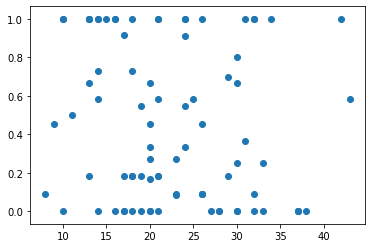

[[64.58519793 -0.53221718]
 [-0.53221718  0.16077558]]
Spearmans correlation: -0.193
p value: 0.0786
Accept null hypothesis that the means are equal.


In [69]:
# prop_choicerej // aq
pyplot.scatter(aq['AQ'],rejchoice)
pyplot.show()
covariance = cov(aq['AQ'],rejchoice)
print(covariance)
corr, _ = spearmanr(aq['AQ'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],rejchoice)
print('p value: %.4f' % p)

alpha = .05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

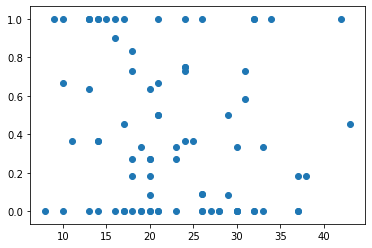

[[64.58519793 -0.57694153]
 [-0.57694153  0.15371071]]
Spearmans correlation: -0.194
p value: 0.0764
Accept null hypothesis that the means are equal.


In [70]:
# prop_choicerej // aq
pyplot.scatter(aq['AQ'],accchoice)
pyplot.show()
covariance = cov(aq['AQ'],accchoice)
print(covariance)
corr, _ = spearmanr(aq['AQ'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],accchoice)
print('p value: %.4f' % p)

alpha = .05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

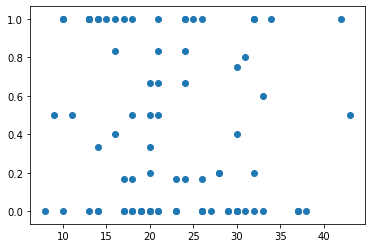

[[64.58519793 -0.532358  ]
 [-0.532358    0.17783144]]
Spearmans correlation: -0.175
p value: 0.1115
Accept null hypothesis that the means are equal.


In [71]:
# prop_choicerej // aq
pyplot.scatter(aq['AQ'],neuchoice)
pyplot.show()
covariance = cov(aq['AQ'],neuchoice)
print(covariance)
corr, _ = spearmanr(aq['AQ'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(aq['AQ'],neuchoice)
print('p value: %.4f' % p)

alpha = .05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

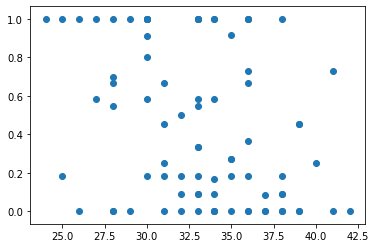

[[16.54202524 -0.53593508]
 [-0.53593508  0.16077558]]
Spearmans correlation: -0.323
p value: 0.0027
Reject the null hypothesis that the means are equal.


In [72]:
# prop_choicerej // ntbs
pyplot.scatter(ntbs['NTBS_score'],rejchoice)
pyplot.show()
covariance = cov(ntbs['NTBS_score'],rejchoice)
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

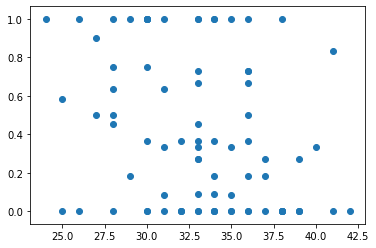

[[16.54202524 -0.51859451]
 [-0.51859451  0.15371071]]
Spearmans correlation: -0.334
p value: 0.0019
Reject the null hypothesis that the means are equal.


In [73]:
# prop_choicerej // ntbs
pyplot.scatter(ntbs['NTBS_score'],accchoice)
pyplot.show()
covariance = cov(ntbs['NTBS_score'],accchoice)
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

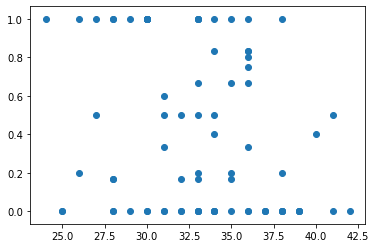

[[16.54202524 -0.44064114]
 [-0.44064114  0.17783144]]
Spearmans correlation: -0.276
p value: 0.0110
Reject the null hypothesis that the means are equal.


In [74]:
# prop_choicerej // ntbs
pyplot.scatter(ntbs['NTBS_score'],neuchoice)
pyplot.show()
covariance = cov(ntbs['NTBS_score'],neuchoice)
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

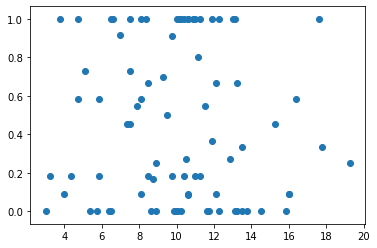

[[12.10593042 -0.09324582]
 [-0.09324582  0.16077558]]
Spearmans correlation: -0.064
p value: 0.5625
Accept null hypothesis that the means are equal.


In [75]:
# prop_choicerej // rsq
pyplot.scatter(rsq["RSQ_finalscore"],rejchoice)
pyplot.show()
covariance = cov(rsq["RSQ_finalscore"],rejchoice)
print(covariance)
corr, _ = spearmanr(rsq["RSQ_finalscore"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq["RSQ_finalscore"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


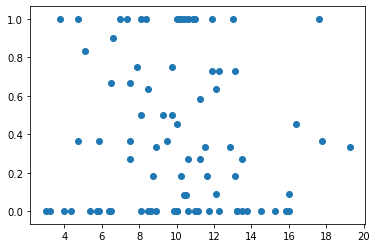

[[12.10593042 -0.08241366]
 [-0.08241366  0.15371071]]
Spearmans correlation: -0.055
p value: 0.6184
Accept null hypothesis that the means are equal.


In [76]:
# prop_choicerej // rsq
pyplot.scatter(rsq["RSQ_finalscore"],accchoice)
pyplot.show()
covariance = cov(rsq["RSQ_finalscore"],accchoice)
print(covariance)
corr, _ = spearmanr(rsq["RSQ_finalscore"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq["RSQ_finalscore"],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


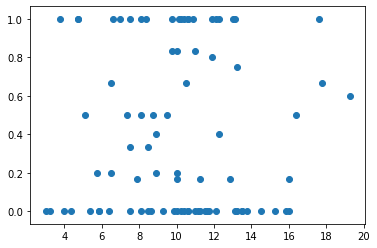

[[1.21059304e+01 8.65874211e-03]
 [8.65874211e-03 1.77831445e-01]]
Spearmans correlation: -0.039
p value: 0.7274
Accept null hypothesis that the means are equal.


In [77]:
# prop_choicerej // rsq
pyplot.scatter(rsq["RSQ_finalscore"],neuchoice)
pyplot.show()
covariance = cov(rsq["RSQ_finalscore"],neuchoice)
print(covariance)
corr, _ = spearmanr(rsq["RSQ_finalscore"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq["RSQ_finalscore"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


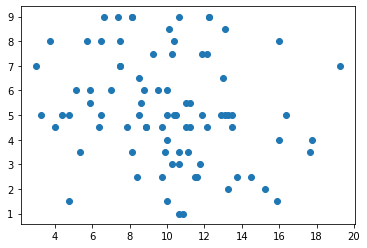

[[12.10593042 -1.51944385]
 [-1.51944385  4.74365318]]
Spearmans correlation: -0.234
p value: 0.0320
Reject the null hypothesis that the means are equal.


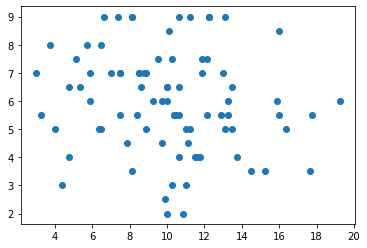

[[12.10593042 -0.96970023]
 [-0.96970023  3.23436604]]
Spearmans correlation: -0.181
p value: 0.0994
Accept null hypothesis that the means are equal.


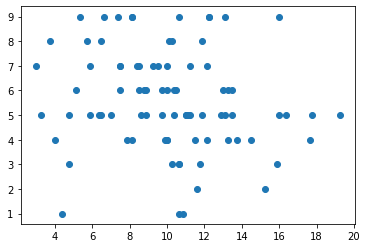

[[12.10593042 -1.1912292 ]
 [-1.1912292   4.12335055]]
Spearmans correlation: -0.212
p value: 0.0529
Accept null hypothesis that the means are equal.


In [78]:
# prop_choicerej // rsq
pyplot.scatter(rsq["RSQ_finalscore"],rejstress)
pyplot.show()
covariance = cov(rsq["RSQ_finalscore"],rejstress)
print(covariance)
corr, _ = spearmanr(rsq["RSQ_finalscore"],rejstress)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq["RSQ_finalscore"],rejstress)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // rsq
pyplot.scatter(rsq["RSQ_finalscore"],accstress)
pyplot.show()
covariance = cov(rsq["RSQ_finalscore"],accstress)
print(covariance)
corr, _ = spearmanr(rsq["RSQ_finalscore"],accstress)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq["RSQ_finalscore"],accstress)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // rsq
pyplot.scatter(rsq["RSQ_finalscore"],neustress)
pyplot.show()
covariance = cov(rsq["RSQ_finalscore"],neustress)
print(covariance)
corr, _ = spearmanr(rsq["RSQ_finalscore"],neustress)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rsq["RSQ_finalscore"],neustress)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    



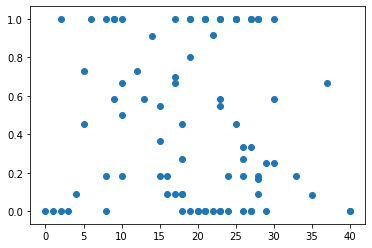

[[83.60111876 -0.28673916]
 [-0.28673916  0.16077558]]
Spearmans correlation: -0.062
p value: 0.5781
Accept null hypothesis that the means are equal.


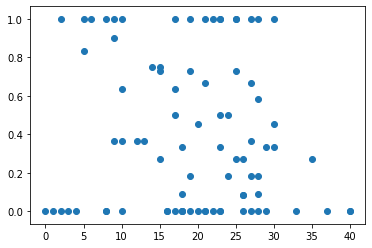

[[83.60111876 -0.46483792]
 [-0.46483792  0.15371071]]
Spearmans correlation: -0.078
p value: 0.4804
Accept null hypothesis that the means are equal.


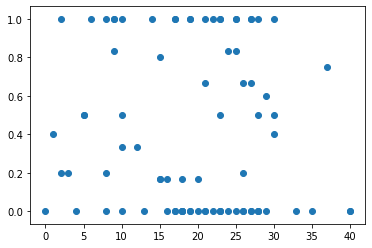

[[83.60111876 -0.35023666]
 [-0.35023666  0.17783144]]
Spearmans correlation: -0.118
p value: 0.2852
Accept null hypothesis that the means are equal.


In [79]:
# prop_choicerej // pss

pyplot.scatter(pss["PSS_score"],rejchoice)
pyplot.show()
covariance = cov(pss["PSS_score"],rejchoice)
print(covariance)
corr, _ = spearmanr(pss["PSS_score"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(pss["PSS_score"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // pss

pyplot.scatter(pss["PSS_score"],accchoice)
pyplot.show()
covariance = cov(pss["PSS_score"],accchoice)
print(covariance)
corr, _ = spearmanr(pss["PSS_score"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(pss["PSS_score"],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // pss

pyplot.scatter(pss["PSS_score"],neuchoice)
pyplot.show()
covariance = cov(pss["PSS_score"],neuchoice)
print(covariance)
corr, _ = spearmanr(pss["PSS_score"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(pss["PSS_score"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

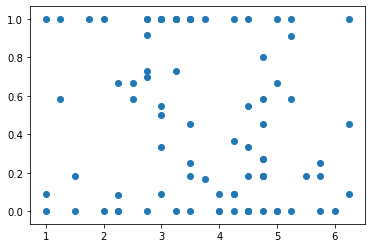

[[ 1.78610872 -0.09610433]
 [-0.09610433  0.16077558]]
Spearmans correlation: -0.162
p value: 0.1404
Accept null hypothesis that the means are equal.


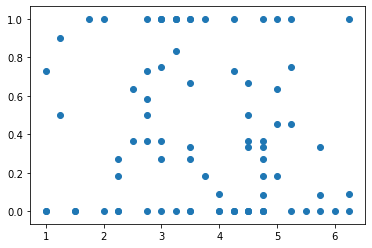

[[ 1.78610872 -0.07174705]
 [-0.07174705  0.15371071]]
Spearmans correlation: -0.117
p value: 0.2881
Accept null hypothesis that the means are equal.


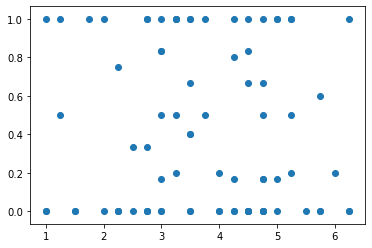

[[ 1.78610872 -0.03402539]
 [-0.03402539  0.17783144]]
Spearmans correlation: -0.027
p value: 0.8102
Accept null hypothesis that the means are equal.


In [80]:
# prop_choicerej // erq emotional suppression
pyplot.scatter(erq['ERQ_emosuppression'],rejchoice)
pyplot.show()
covariance = cov(erq['ERQ_emosuppression'],rejchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_emosuppression'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_emosuppression'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // erq emotional suppression
pyplot.scatter(erq['ERQ_emosuppression'],accchoice)
pyplot.show()
covariance = cov(erq['ERQ_emosuppression'],accchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_emosuppression'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_emosuppression'],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

# prop_choicerej // erq emotional suppression
pyplot.scatter(erq['ERQ_emosuppression'],neuchoice)
pyplot.show()
covariance = cov(erq['ERQ_emosuppression'],neuchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_emosuppression'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_emosuppression'],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

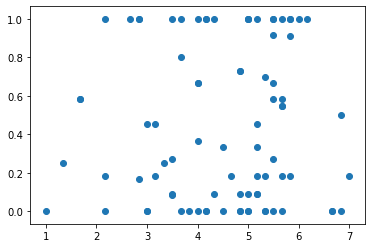

[[1.77910053 0.01839899]
 [0.01839899 0.16077558]]
Spearmans correlation: 0.049
p value: 0.6594
Accept null hypothesis that the means are equal.


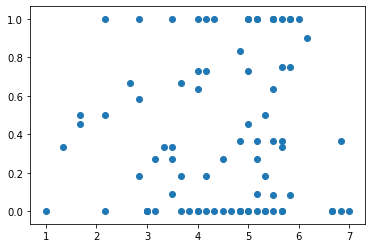

[[1.77910053 0.02702085]
 [0.02702085 0.15371071]]
Spearmans correlation: 0.071
p value: 0.5221
Accept null hypothesis that the means are equal.


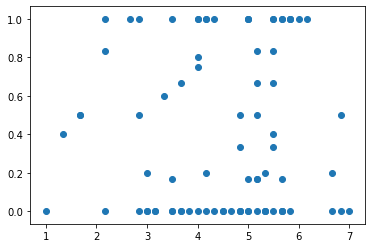

[[1.77910053 0.01046806]
 [0.01046806 0.17783144]]
Spearmans correlation: 0.062
p value: 0.5744
Accept null hypothesis that the means are equal.


In [81]:
# prop_choicerej // erq emotional cogreappraisal
pyplot.scatter(erq['ERQ_cogreappraisal'],rejchoice)
pyplot.show()
covariance = cov(erq['ERQ_cogreappraisal'],rejchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_cogreappraisal'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_cogreappraisal'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

# prop_choicerej // erq emotional cogreappraisal
pyplot.scatter(erq['ERQ_cogreappraisal'],accchoice)
pyplot.show()
covariance = cov(erq['ERQ_cogreappraisal'],accchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_cogreappraisal'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_cogreappraisal'],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // erq emotional cogreappraisal
pyplot.scatter(erq['ERQ_cogreappraisal'],neuchoice)
pyplot.show()
covariance = cov(erq['ERQ_cogreappraisal'],neuchoice)
print(covariance)
corr, _ = spearmanr(erq['ERQ_cogreappraisal'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(erq['ERQ_cogreappraisal'],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')



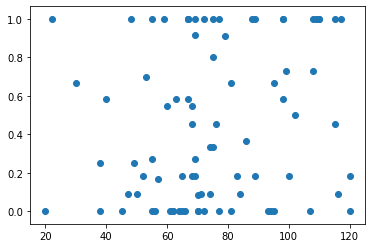

[[5.31108434e+02 1.68503103e+00]
 [1.68503103e+00 1.60775580e-01]]
Spearmans correlation: 0.194
p value: 0.0771
Accept null hypothesis that the means are equal.


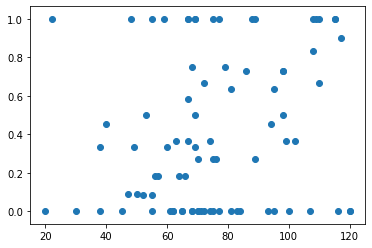

[[5.31108434e+02 1.94958014e+00]
 [1.94958014e+00 1.53710712e-01]]
Spearmans correlation: 0.171
p value: 0.1191
Accept null hypothesis that the means are equal.


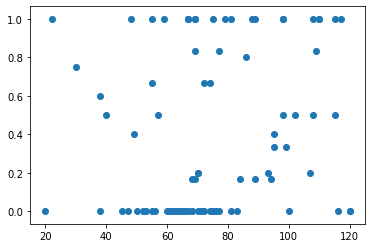

[[5.31108434e+02 1.66204819e+00]
 [1.66204819e+00 1.77831445e-01]]
Spearmans correlation: 0.230
p value: 0.0356
Reject the null hypothesis that the means are equal.


In [82]:
# prop_choicerej // scs

pyplot.scatter(scs["SCS_score"],rejchoice)
pyplot.show()
covariance = cov(scs["SCS_score"],rejchoice)
print(covariance)
corr, _ = spearmanr(scs["SCS_score"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs["SCS_score"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // scs

pyplot.scatter(scs["SCS_score"],accchoice)
pyplot.show()
covariance = cov(scs["SCS_score"],accchoice)
print(covariance)
corr, _ = spearmanr(scs["SCS_score"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs["SCS_score"],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // scs

pyplot.scatter(scs["SCS_score"],neuchoice)
pyplot.show()
covariance = cov(scs["SCS_score"],neuchoice)
print(covariance)
corr, _ = spearmanr(scs["SCS_score"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(scs["SCS_score"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

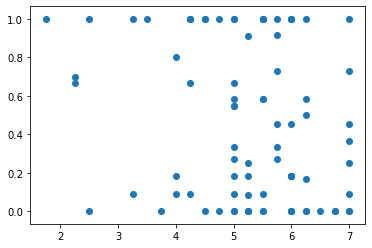

[[ 1.40497705 -0.11614293]
 [-0.11614293  0.16077558]]
Spearmans correlation: -0.221
p value: 0.0429
Reject the null hypothesis that the means are equal.


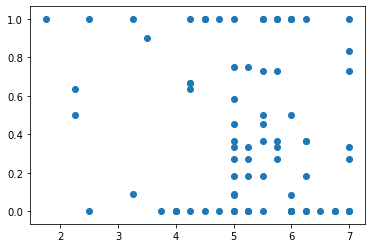

[[ 1.40497705 -0.08153328]
 [-0.08153328  0.15371071]]
Spearmans correlation: -0.150
p value: 0.1744
Accept null hypothesis that the means are equal.


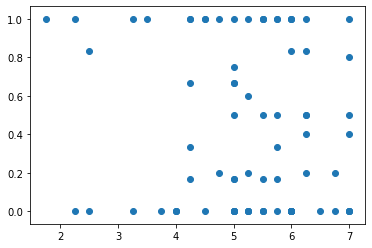

[[ 1.40497705 -0.06553356]
 [-0.06553356  0.17783144]]
Spearmans correlation: -0.090
p value: 0.4142
Accept null hypothesis that the means are equal.


In [83]:
# prop_choicerej // srq admiration

pyplot.scatter(srq["SRQ_admiration"],rejchoice)
pyplot.show()
covariance = cov(srq["SRQ_admiration"],rejchoice)
print(covariance)
corr, _ = spearmanr(srq["SRQ_admiration"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq["SRQ_admiration"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq admiration

pyplot.scatter(srq["SRQ_admiration"],accchoice)
pyplot.show()
covariance = cov(srq["SRQ_admiration"],accchoice)
print(covariance)
corr, _ = spearmanr(srq["SRQ_admiration"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq["SRQ_admiration"],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq admiration

pyplot.scatter(srq["SRQ_admiration"],neuchoice)
pyplot.show()
covariance = cov(srq["SRQ_admiration"],neuchoice)
print(covariance)
corr, _ = spearmanr(srq["SRQ_admiration"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq["SRQ_admiration"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

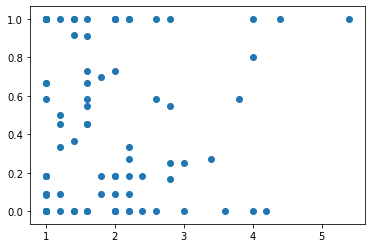

[[0.92192197 0.01087432]
 [0.01087432 0.16077558]]
Spearmans correlation: -0.032
p value: 0.7731
Accept null hypothesis that the means are equal.


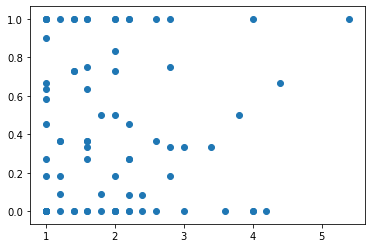

[[0.92192197 0.01093426]
 [0.01093426 0.15371071]]
Spearmans correlation: 0.023
p value: 0.8341
Accept null hypothesis that the means are equal.


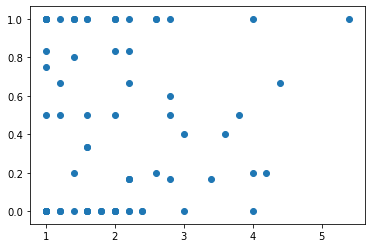

[[0.92192197 0.03124928]
 [0.03124928 0.17783144]]
Spearmans correlation: 0.107
p value: 0.3332
Accept null hypothesis that the means are equal.


In [84]:
# prop_choicerej // srq negsocpot

pyplot.scatter(srq['SRQ_negsocpot'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_negsocpot'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_negsocpot'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_negsocpot'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq negsocpot

pyplot.scatter(srq['SRQ_negsocpot'],accchoice)
pyplot.show()
covariance = cov(srq['SRQ_negsocpot'],accchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_negsocpot'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_negsocpot'],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq negsocpot

pyplot.scatter(srq['SRQ_negsocpot'],neuchoice)
pyplot.show()
covariance = cov(srq['SRQ_negsocpot'],neuchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_negsocpot'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_negsocpot'],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

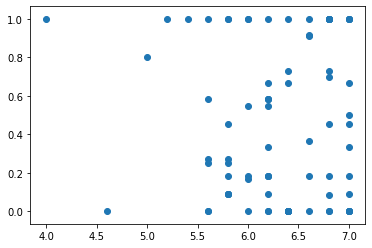

[[ 0.35228342 -0.00412855]
 [-0.00412855  0.16077558]]
Spearmans correlation: -0.010
p value: 0.9287
Accept null hypothesis that the means are equal.


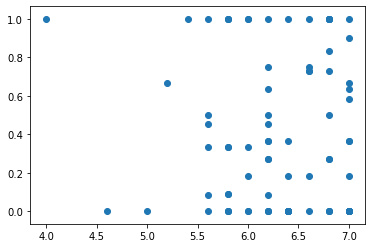

[[ 0.35228342 -0.00675572]
 [-0.00675572  0.15371071]]
Spearmans correlation: -0.037
p value: 0.7382
Accept null hypothesis that the means are equal.


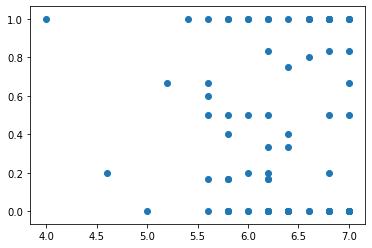

[[ 0.35228342 -0.01323723]
 [-0.01323723  0.17783144]]
Spearmans correlation: -0.082
p value: 0.4564
Accept null hypothesis that the means are equal.


In [85]:
# prop_choicerej // srq prosocint

pyplot.scatter(srq['SRQ_prosocint'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_prosocint'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_prosocint'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_prosocint'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq prosocint

pyplot.scatter(srq['SRQ_prosocint'],accchoice)
pyplot.show()
covariance = cov(srq['SRQ_prosocint'],accchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_prosocint'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_prosocint'],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq prosocint

pyplot.scatter(srq['SRQ_prosocint'],neuchoice)
pyplot.show()
covariance = cov(srq['SRQ_prosocint'],neuchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_prosocint'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_prosocint'],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

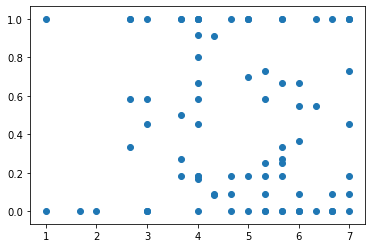

[[ 2.19128897 -0.04464872]
 [-0.04464872  0.16077558]]
Spearmans correlation: -0.094
p value: 0.3942
Accept null hypothesis that the means are equal.


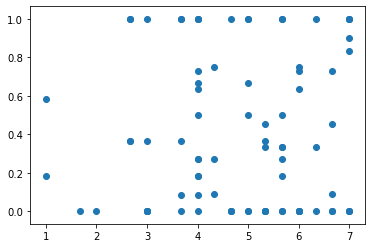

[[2.19128897 0.01465972]
 [0.01465972 0.15371071]]
Spearmans correlation: -0.024
p value: 0.8270
Accept null hypothesis that the means are equal.


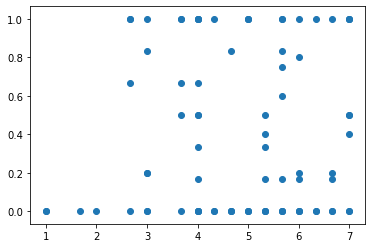

[[2.19128897 0.02348202]
 [0.02348202 0.17783144]]
Spearmans correlation: 0.014
p value: 0.8960
Accept null hypothesis that the means are equal.


In [86]:
# prop_choicerej // srq sexrel

pyplot.scatter(srq['SRQ_sexrel'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_sexrel'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sexrel'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sexrel'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq sexrel

pyplot.scatter(srq['SRQ_sexrel'],accchoice)
pyplot.show()
covariance = cov(srq['SRQ_sexrel'],accchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sexrel'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sexrel'],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq sexrel

pyplot.scatter(srq['SRQ_sexrel'],neuchoice)
pyplot.show()
covariance = cov(srq['SRQ_sexrel'],neuchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sexrel'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sexrel'],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

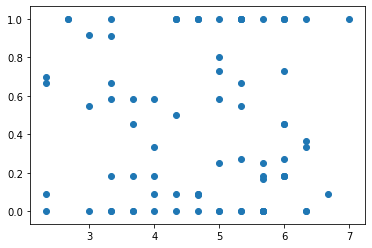

[[ 1.39432333 -0.01579797]
 [-0.01579797  0.16077558]]
Spearmans correlation: -0.012
p value: 0.9162
Accept null hypothesis that the means are equal.


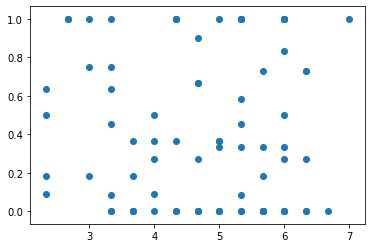

[[ 1.39432333 -0.01808641]
 [-0.01808641  0.15371071]]
Spearmans correlation: -0.074
p value: 0.5058
Accept null hypothesis that the means are equal.


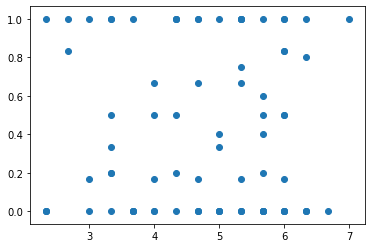

[[1.39432333e+00 6.23924269e-04]
 [6.23924269e-04 1.77831445e-01]]
Spearmans correlation: -0.028
p value: 0.7996
Accept null hypothesis that the means are equal.


In [87]:
# prop_choicerej // srq sociability

pyplot.scatter(srq['SRQ_sociability'],rejchoice)
pyplot.show()
covariance = cov(srq['SRQ_sociability'],rejchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sociability'],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sociability'],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq sociability

pyplot.scatter(srq['SRQ_sociability'],accchoice)
pyplot.show()
covariance = cov(srq['SRQ_sociability'],accchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sociability'],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sociability'],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // srq sociability

pyplot.scatter(srq['SRQ_sociability'],neuchoice)
pyplot.show()
covariance = cov(srq['SRQ_sociability'],neuchoice)
print(covariance)
corr, _ = spearmanr(srq['SRQ_sociability'],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq['SRQ_sociability'],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

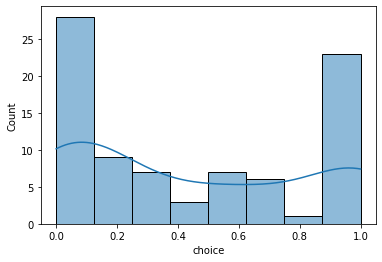

In [88]:
sns.histplot(data= rejchoice, kde=True)

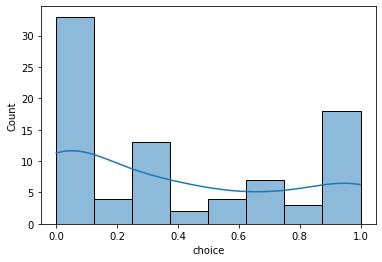

In [89]:
sns.histplot(data= accchoice, kde=True)

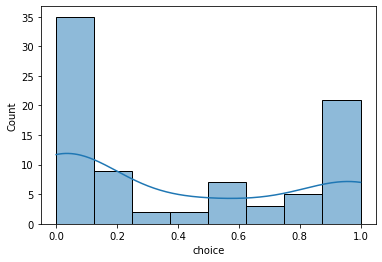

In [90]:
sns.histplot(data= neuchoice, kde=True)

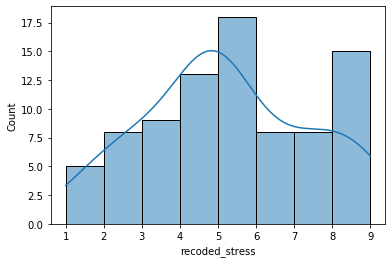

In [91]:
sns.histplot(data= rejstress, kde=True)

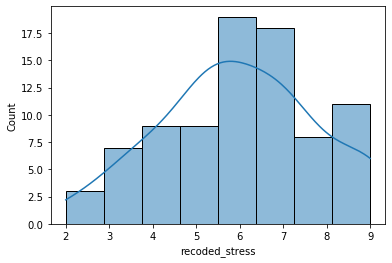

In [92]:
sns.histplot(data= accstress, kde=True)

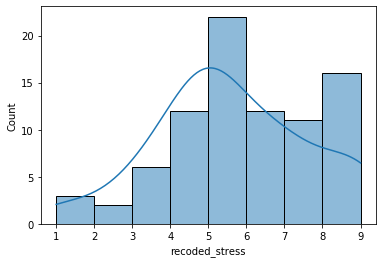

In [93]:
sns.histplot(data= neustress, kde=True)

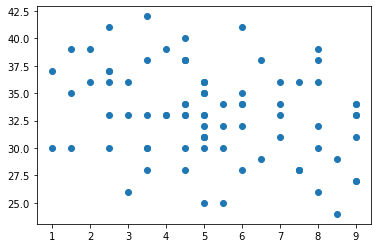

[[ 4.74365318 -2.53635972]
 [-2.53635972 16.54202524]]
Spearmans correlation: -0.280
p value: 0.0098
Reject the null hypothesis that the means are equal.


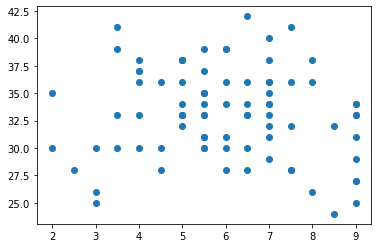

[[ 3.23436604 -0.8336202 ]
 [-0.8336202  16.54202524]]
Spearmans correlation: -0.113
p value: 0.3078
Accept null hypothesis that the means are equal.


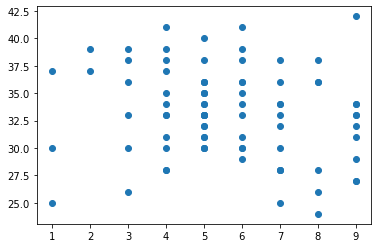

[[ 4.12335055 -1.31009753]
 [-1.31009753 16.54202524]]
Spearmans correlation: -0.181
p value: 0.0994
Accept null hypothesis that the means are equal.


In [94]:
# rejstress // ntbs
pyplot.scatter(rejstress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(rejstress, ntbs['NTBS_score'])
print(covariance)
corr, _ = spearmanr(rejstress, ntbs['NTBS_score'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rejstress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

# rejstress // ntbs
pyplot.scatter(accstress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(accstress, ntbs['NTBS_score'])
print(covariance)
corr, _ = spearmanr(accstress, ntbs['NTBS_score'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(accstress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# rejstress // ntbs
pyplot.scatter(neustress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(neustress, ntbs['NTBS_score'])
print(covariance)
corr, _ = spearmanr(neustress, ntbs['NTBS_score'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(neustress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')


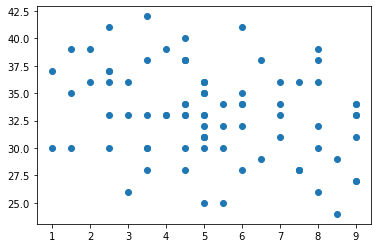

[[ 4.74365318 -2.53635972]
 [-2.53635972 16.54202524]]
Pearsons correlation: -0.286
p value: 0.0083
Reject the null hypothesis that the means are equal.


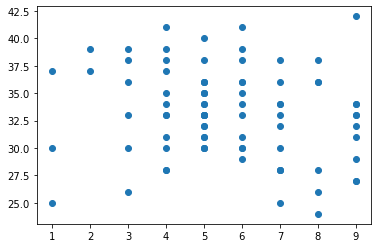

[[ 4.12335055 -1.31009753]
 [-1.31009753 16.54202524]]
Pearsons correlation: -0.159
p value: 0.1495
Accept null hypothesis that the means are equal.


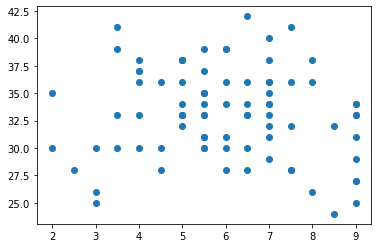

[[ 3.23436604 -0.8336202 ]
 [-0.8336202  16.54202524]]
Pearsons correlation: -0.114
p value: 0.3020
Accept null hypothesis that the means are equal.


In [95]:
#rejstress // ntbs
pyplot.scatter(rejstress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(rejstress, ntbs['NTBS_score'])
print(covariance)
corr, _ = pearsonr(rejstress, ntbs['NTBS_score'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(rejstress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
#rejstress // ntbs
pyplot.scatter(neustress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(neustress, ntbs['NTBS_score'])
print(covariance)
corr, _ = pearsonr(neustress, ntbs['NTBS_score'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(neustress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
#rejstress // ntbs
pyplot.scatter(accstress, ntbs['NTBS_score'])
pyplot.show()
covariance = cov(accstress, ntbs['NTBS_score'])
print(covariance)
corr, _ = pearsonr(accstress, ntbs['NTBS_score'])
print('Pearsons correlation: %.3f' % corr)
r,p = scipy.stats.pearsonr(accstress, ntbs['NTBS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

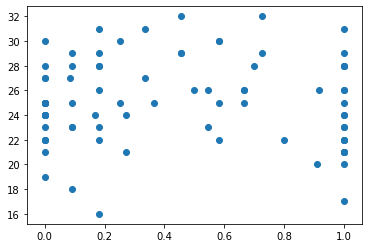

[[ 0.16077558 -0.05897443]
 [-0.05897443 11.95123351]]
Spearmansr correlation: -0.012
p value: 0.9108
Accept null hypothesis that the means are equal.


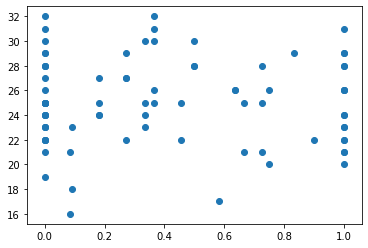

[[ 1.53710712e-01 -9.32431023e-03]
 [-9.32431023e-03  1.19512335e+01]]
Spearmansr correlation: -0.001
p value: 0.9925
Accept null hypothesis that the means are equal.


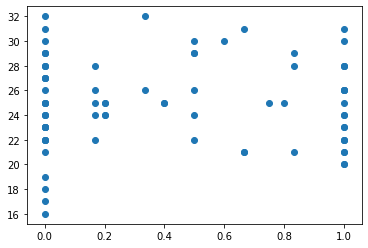

[[ 0.17783144  0.01963569]
 [ 0.01963569 11.95123351]]
Spearmansr correlation: -0.000
p value: 0.9982
Accept null hypothesis that the means are equal.


In [96]:
# prop_choicerej // rr
pyplot.scatter(rejchoice, rr['RR_score'])
pyplot.show()
covariance = cov(rejchoice, rr['RR_score'])
print(covariance)
corr, _ = spearmanr(rejchoice, rr['RR_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rejchoice, rr['RR_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // rr
pyplot.scatter(accchoice, rr['RR_score'])
pyplot.show()
covariance = cov(accchoice, rr['RR_score'])
print(covariance)
corr, _ = spearmanr(accchoice, rr['RR_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(accchoice, rr['RR_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // rr
pyplot.scatter(neuchoice, rr['RR_score'])
pyplot.show()
covariance = cov(neuchoice, rr['RR_score'])
print(covariance)
corr, _ = spearmanr(neuchoice, rr['RR_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(neuchoice, rr['RR_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

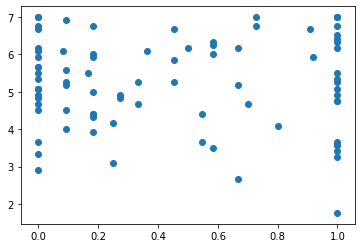

[[ 0.16077558 -0.00349711]
 [-0.00349711  1.444304  ]]
Spearmansr correlation: 0.013
p value: 0.9096
Accept null hypothesis that the means are equal.


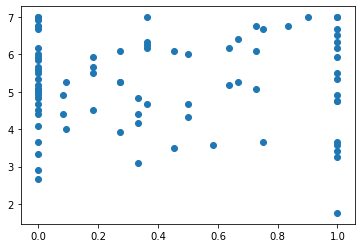

[[0.15371071 0.01614396]
 [0.01614396 1.444304  ]]
Spearmansr correlation: 0.056
p value: 0.6104
Accept null hypothesis that the means are equal.


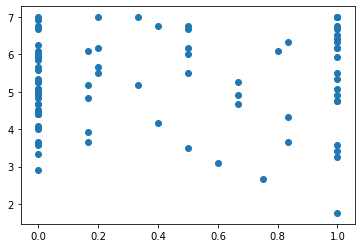

[[0.17783144 0.031804  ]
 [0.031804   1.444304  ]]
Spearmansr correlation: 0.140
p value: 0.2043
Accept null hypothesis that the means are equal.


In [97]:
# prop_choicerej // mspss
pyplot.scatter(rejchoice, mspss['MSPSS_score'])
pyplot.show()
covariance = cov(rejchoice, mspss['MSPSS_score'])
print(covariance)
corr, _ = spearmanr(rejchoice, mspss['MSPSS_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(rejchoice, mspss['MSPSS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
# prop_choicerej // mspss
pyplot.scatter(accchoice, mspss['MSPSS_score'])
pyplot.show()
covariance = cov(accchoice, mspss['MSPSS_score'])
print(covariance)
corr, _ = spearmanr(accchoice, mspss['MSPSS_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(accchoice, mspss['MSPSS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

# prop_choicerej // mspss
pyplot.scatter(neuchoice, mspss['MSPSS_score'])
pyplot.show()
covariance = cov(neuchoice, mspss['MSPSS_score'])
print(covariance)
corr, _ = spearmanr(neuchoice, mspss['MSPSS_score'])
print('Spearmansr correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(neuchoice, mspss['MSPSS_score'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [98]:
ntbschoicescatter = pd.DataFrame()
ntbschoicescatter['ntbs_'] = ntbs['NTBS_score']
ntbschoicescatter['rejchoice_'] = rejchoice


In [99]:
print(ntbschoicescatter)

    ntbs_  rejchoice_
0      34    1.000000
1      31    0.250000
2      38    0.090909
3      32    0.500000
4      30    1.000000
..    ...         ...
79     32    0.000000
80     33    0.545455
81     36    0.666667
82     34    1.000000
83     34    0.166667

[84 rows x 2 columns]


In [100]:
#r = scipy.stats.pearsonr(x=ntbschoicescatter.ntbs, y=ntbschoicescatter.rejchoice)[0]
#scatterntbschoice = sns.scatterplot(data=ntbschoicescatter, x=ntbschoicescatter.ntbs, y=ntbschoicescatter.rejchoice)
#scatterntbschoice.set_title('Need to Belong and Choice')
#scatterntbschoice= plt.text(24, .8, 'r = ' + str(round(r, 2)))
#plt.savefig('ntbschoicescatterplot.png')


In [101]:
ntbsstressscatter = pd.DataFrame()
ntbsstressscatter['ntbs_'] = ntbs['NTBS_score']
ntbsstressscatter['rejstress_'] = rej['recoded_stress']
print(ntbsstressscatter)


    ntbs_  rejstress_
0      34         4.5
1      31         7.0
2      38         4.5
3      32         6.0
4      30         8.0
..    ...         ...
79     32         5.0
80     33         2.5
81     36         2.0
82     34         9.0
83     34         6.0

[84 rows x 2 columns]


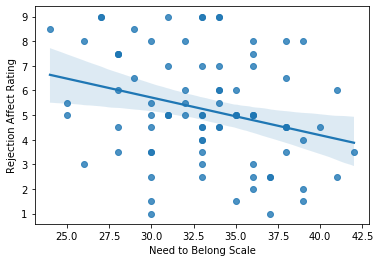

In [102]:
r = scipy.stats.pearsonr(x=ntbsstressscatter.ntbs_, y=ntbsstressscatter.rejstress_)[0]
ntbs_stress_scatter = sns.regplot(x= "ntbs_", y= "rejstress_", data= ntbsstressscatter)
ntbs_stress_scatter.set_ylabel('Rejection Affect Rating')
ntbs_stress_scatter.set_xlabel('Need to Belong Scale')
#ntbs_stress_scatter.text(24, 1.5, 'r = ' + str(round(r, 2)))
plt.savefig('ntbs_stress_scatter.png', bbox_inches='tight')


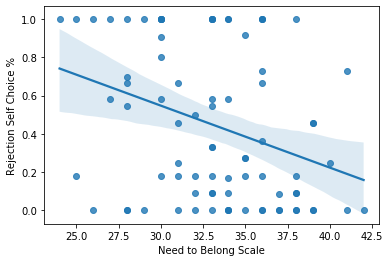

In [103]:
r = scipy.stats.spearmanr(a=ntbschoicescatter.ntbs_, b=ntbschoicescatter.rejchoice_)[0]
scatterntbschoice = sns.regplot(x= "ntbs_", y= "rejchoice_", data= ntbschoicescatter)
scatterntbschoice.set_ylabel('Rejection Self Choice %')
scatterntbschoice.set_xlabel('Need to Belong Scale')
#scatterntbschoice= plt.text(24, .85, 'r = ' + str(round(r, 2)))
plt.savefig('ntbs_choice_scatterplot.png',bbox_inches='tight')

In [104]:
ntbssaliencescatter = pd.DataFrame()
ntbssaliencescatter['ntbs_'] = ntbs['NTBS_score']
ntbssaliencescatter['salience_'] = rej['salience_mean']
print(ntbsstressscatter)

    ntbs_  rejstress_
0      34         4.5
1      31         7.0
2      38         4.5
3      32         6.0
4      30         8.0
..    ...         ...
79     32         5.0
80     33         2.5
81     36         2.0
82     34         9.0
83     34         6.0

[84 rows x 2 columns]


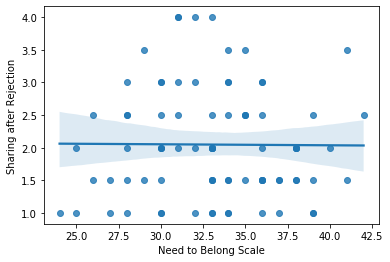

In [105]:
r = scipy.stats.pearsonr(x=ntbschoicescatter.ntbs_, y=ntbschoicescatter.rejchoice_)[0]
scatterntbssalience = sns.regplot(x= "ntbs_", y= "salience_", data= ntbssaliencescatter)
scatterntbssalience.set_ylabel('Sharing after Rejection')
scatterntbssalience.set_xlabel('Need to Belong Scale')
#scatterntbssalience= plt.text(24, 3.5, 'r = ' + str(round(r, 2)))
plt.savefig('ntbs_salience_scatterplot.png',bbox_inches='tight')

In [106]:
aqchoicescatter = pd.DataFrame()
aqchoicescatter['AQ_'] = aq['AQ']
aqchoicescatter['rejchoice_'] = rejchoice
print(aqchoicescatter)

     AQ_  rejchoice_
0   24.0    1.000000
1   33.0    0.250000
2   32.0    0.090909
3   11.0    0.500000
4   21.0    1.000000
..   ...         ...
79  30.0    0.000000
80  19.0    0.545455
81  30.0    0.666667
82  10.0    1.000000
83  20.0    0.166667

[84 rows x 2 columns]


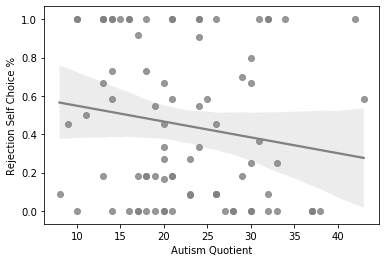

In [107]:
r = scipy.stats.spearmanr(a=aqchoicescatter.AQ_, b=aqchoicescatter.rejchoice_)[0]
scatter_aq_choice = sns.regplot(x= "AQ_", y= "rejchoice_", data= aqchoicescatter,scatter_kws={"color": "gray"}, line_kws={"color": "gray"})
#scatter_aq_choice.set_title('Autism Quotient and Choice')
scatter_aq_choice.set_ylabel('Rejection Self Choice %')
scatter_aq_choice.set_xlabel('Autism Quotient')
#scatter_aq_choice= plt.text(9.5, .82, 'r = ' + str(round(r, 2)))
plt.savefig('aq_choice_scatterplot.png',bbox_inches='tight')

In [108]:
srqadmirationchoicescatter = pd.DataFrame()
srqadmirationchoicescatter['SRQ_admiration_'] = srq['SRQ_admiration']
srqadmirationchoicescatter['rejchoice_'] = rejchoice
print(srqadmirationchoicescatter)

    SRQ_admiration_  rejchoice_
0              2.50    1.000000
1              5.25    0.250000
2              4.00    0.090909
3              6.25    0.500000
4              6.00    1.000000
..              ...         ...
79             6.00    0.000000
80             5.00    0.545455
81             5.00    0.666667
82             7.00    1.000000
83             6.25    0.166667

[84 rows x 2 columns]


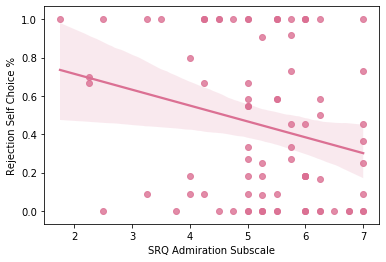

In [109]:
r = scipy.stats.spearmanr(a=srqadmirationchoicescatter.SRQ_admiration_, b=srqadmirationchoicescatter.rejchoice_)[0]
scatter_srqadmiration_choice = sns.regplot(x= "SRQ_admiration_", y= "rejchoice_", data= srqadmirationchoicescatter, scatter_kws={"color": "palevioletred"}, line_kws={"color": "palevioletred"})
scatter_srqadmiration_choice.set_ylabel('Rejection Self Choice %')
scatter_srqadmiration_choice.set_xlabel('SRQ Admiration Subscale')
#scatter_srqadmiration_choice= plt.text(2, .82, 'r = ' + str(round(r, 2)))
plt.savefig('srqadmiration_choice_scatterplot.png', bbox_inches='tight')

In [110]:
#affect ratings in rejection condition
rejstress_mean = rej['recoded_stress'].mean()
rejstress_std = rej['recoded_stress'].std()
print('rejstress_mean')
print(rejstress_mean)
print('rejstress_std')
print(rejstress_std)

rejstress_mean
5.232142857142857
rejstress_std
2.177992925646278


In [111]:
#affect ratings in neutral condition
neustress_mean = neu['recoded_stress'].mean()
neustress_std = neu['recoded_stress'].std()
print('neustress_mean')
print(neustress_mean)
print('neustress_std')
print(neustress_std)

neustress_mean
5.595238095238095
neustress_std
2.0306034928161854


In [112]:
#affect ratings in acceptance condition
accstress_mean = acc['recoded_stress'].mean()
accstress_std = acc['recoded_stress'].std()
print('accstress_mean')
print(accstress_mean)
print('accstress_std')
print(accstress_std)

accstress_mean
5.976190476190476
accstress_std
1.7984343289569555


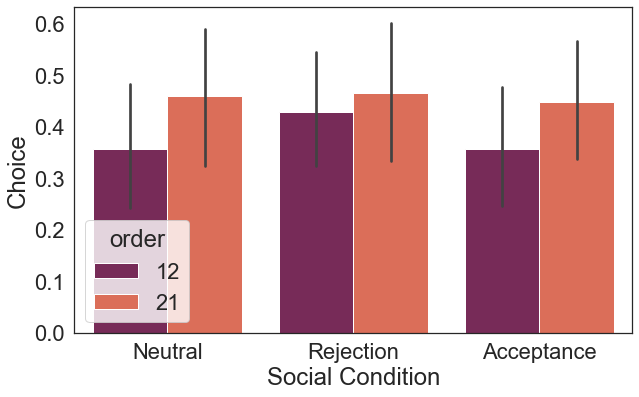

In [113]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
choiceplot = sns.barplot(x='Social Condition', y='Choice', palette='rocket',data= plottingdata, hue='order')#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
choiceplot.figure.savefig('ANOVA_choiceplot.png',bbox_inches='tight')

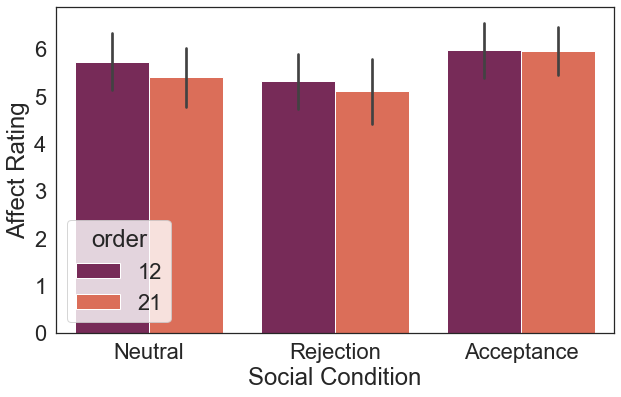

In [114]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
choiceplot = sns.barplot(x='Social Condition', y='recoded_stress', data= plottingdata,palette= 'rocket', hue = 'order')#,errorbar=('ci', 68))
choiceplot.set_ylabel('Affect Rating')
choiceplot.set_xlabel('Social Condition')
#choiceplot.set_ylim(1, 9)
choiceplot.figure.savefig('ANOVA_affectplot.png',bbox_inches='tight')

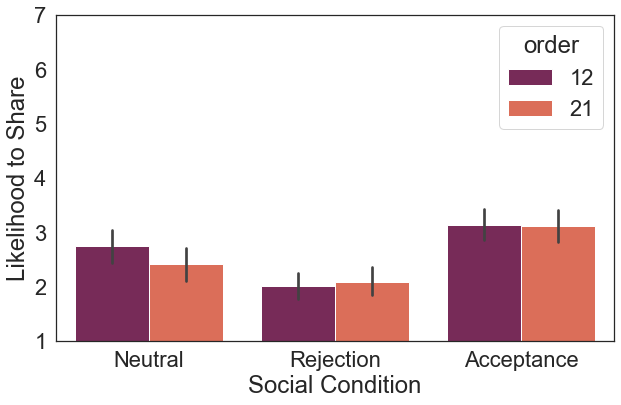

In [115]:
sns.set(font_scale=2)
sns.set_style('white')
plt.figure(figsize=(10,6))
choiceplot = sns.barplot(x='Social Condition', y='salience_mean', data= plottingdata,palette= 'rocket',hue = 'order') #errorbar=('ci', 68))
choiceplot.set_ylabel('Likelihood to Share')
choiceplot.set_xlabel('Social Condition')
choiceplot.set_ylim(1, 7)
choiceplot.figure.savefig('ANOVA_sharingplot.png',bbox_inches='tight')

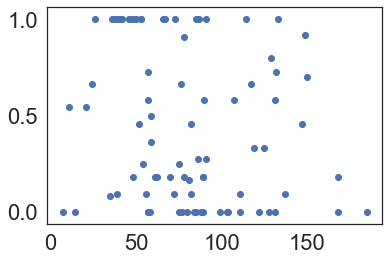

[[ 1.48145425e+03 -3.20589544e+00]
 [-3.20589544e+00  1.60775580e-01]]
Spearmans correlation: -0.247
p value: 0.0233
Reject the null hypothesis that the means are equal.


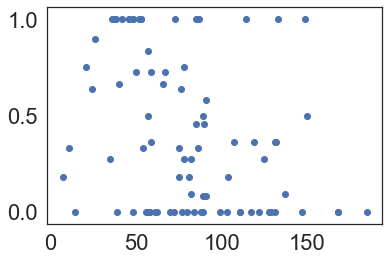

[[ 1.48145425e+03 -4.91339970e+00]
 [-4.91339970e+00  1.53710712e-01]]
Spearmans correlation: -0.335
p value: 0.0019
Reject the null hypothesis that the means are equal.


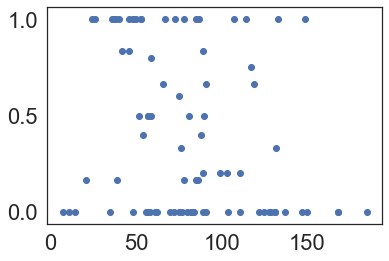

[[ 1.48145425e+03 -4.28171974e+00]
 [-4.28171974e+00  1.77831445e-01]]
Spearmans correlation: -0.272
p value: 0.0122
Reject the null hypothesis that the means are equal.


In [116]:
pyplot.scatter(LSAS["LSAS_total"],rejchoice)
pyplot.show()
covariance = cov(LSAS["LSAS_total"],rejchoice)
print(covariance)
corr, _ = spearmanr(LSAS["LSAS_total"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(LSAS["LSAS_total"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(LSAS["LSAS_total"],accchoice)
pyplot.show()
covariance = cov(LSAS["LSAS_total"],accchoice)
print(covariance)
corr, _ = spearmanr(LSAS["LSAS_total"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(LSAS["LSAS_total"],accchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(LSAS["LSAS_total"],neuchoice)
pyplot.show()
covariance = cov(LSAS["LSAS_total"],neuchoice)
print(covariance)
corr, _ = spearmanr(LSAS["LSAS_total"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(LSAS["LSAS_total"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

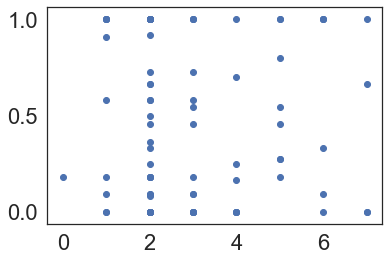

[[2.87822719 0.00796954]
 [0.00796954 0.16077558]]
Spearmans correlation: -0.031
p value: 0.7822
Accept null hypothesis that the means are equal.


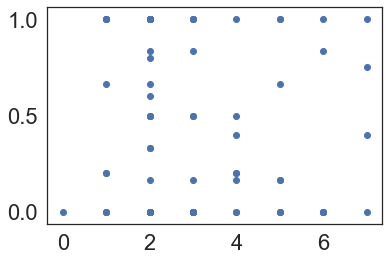

[[ 2.87822719 -0.03620912]
 [-0.03620912  0.17783144]]
Spearmans correlation: -0.080
p value: 0.4697
Accept null hypothesis that the means are equal.


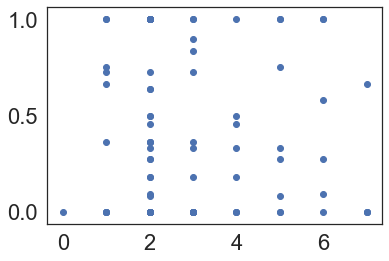

[[ 2.87822719 -0.03989921]
 [-0.03989921  0.15371071]]
Spearmans correlation: -0.065
p value: 0.5554
Accept null hypothesis that the means are equal.


In [117]:
pyplot.scatter(DII["DII_dysfuntionalimpulsivity"],rejchoice)
pyplot.show()
covariance = cov(DII["DII_dysfuntionalimpulsivity"],rejchoice)
print(covariance)
corr, _ = spearmanr(DII["DII_dysfuntionalimpulsivity"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(DII["DII_dysfuntionalimpulsivity"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(DII["DII_dysfuntionalimpulsivity"],neuchoice)
pyplot.show()
covariance = cov(DII["DII_dysfuntionalimpulsivity"],neuchoice)
print(covariance)
corr, _ = spearmanr(DII["DII_dysfuntionalimpulsivity"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(DII["DII_dysfuntionalimpulsivity"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(DII["DII_dysfuntionalimpulsivity"],accchoice)
pyplot.show()
covariance = cov(DII["DII_dysfuntionalimpulsivity"],accchoice)
print(covariance)
corr, _ = spearmanr(DII["DII_dysfuntionalimpulsivity"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(DII["DII_dysfuntionalimpulsivity"],accchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

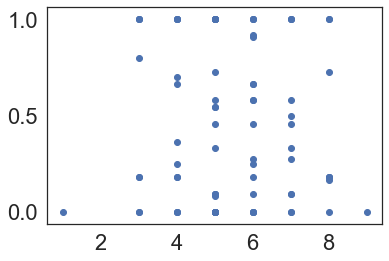

[[ 2.39400459 -0.01923973]
 [-0.01923973  0.16077558]]
Spearmans correlation: -0.015
p value: 0.8892
Accept null hypothesis that the means are equal.


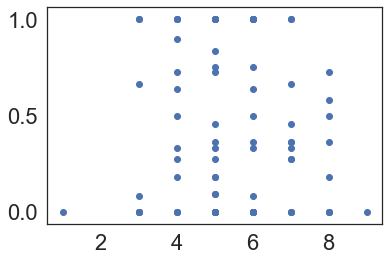

[[ 2.39400459 -0.03065052]
 [-0.03065052  0.15371071]]
Spearmans correlation: -0.035
p value: 0.7511
Accept null hypothesis that the means are equal.


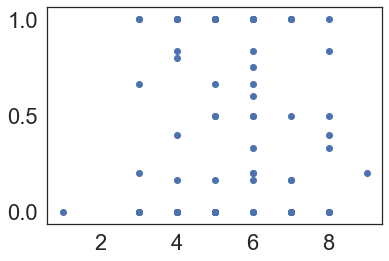

[[2.39400459 0.00743689]
 [0.00743689 0.17783144]]
Spearmans correlation: 0.041
p value: 0.7116
Accept null hypothesis that the means are equal.


In [118]:
pyplot.scatter(DII["DII_functionalimpulsivity"],rejchoice)
pyplot.show()
covariance = cov(DII["DII_functionalimpulsivity"],rejchoice)
print(covariance)
corr, _ = spearmanr(DII["DII_functionalimpulsivity"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(DII["DII_functionalimpulsivity"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(DII["DII_functionalimpulsivity"],accchoice)
pyplot.show()
covariance = cov(DII["DII_functionalimpulsivity"],accchoice)
print(covariance)
corr, _ = spearmanr(DII["DII_functionalimpulsivity"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(DII["DII_functionalimpulsivity"],accchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(DII["DII_functionalimpulsivity"],neuchoice)
pyplot.show()
covariance = cov(DII["DII_functionalimpulsivity"],neuchoice)
print(covariance)
corr, _ = spearmanr(DII["DII_functionalimpulsivity"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(DII["DII_functionalimpulsivity"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

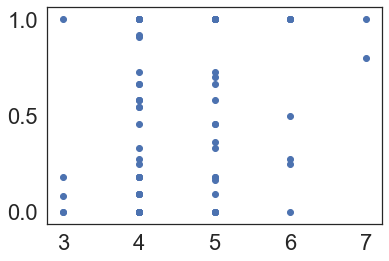

[[0.73436604 0.11442828]
 [0.11442828 0.16077558]]
Spearmans correlation: 0.325
p value: 0.0026
Reject the null hypothesis that the means are equal.


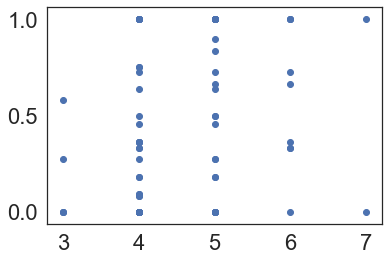

[[0.73436604 0.10433944]
 [0.10433944 0.15371071]]
Spearmans correlation: 0.322
p value: 0.0028
Reject the null hypothesis that the means are equal.


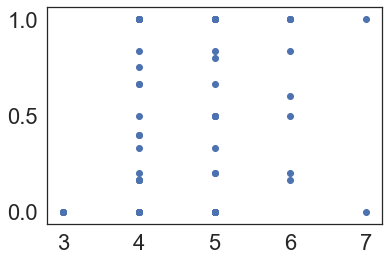

[[0.73436604 0.11993689]
 [0.11993689 0.17783144]]
Spearmans correlation: 0.360
p value: 0.0008
Reject the null hypothesis that the means are equal.


In [119]:
pyplot.scatter(dast["DAST_score"],rejchoice)
pyplot.show()
covariance = cov(dast["DAST_score"],rejchoice)
print(covariance)
corr, _ = spearmanr(dast["DAST_score"],rejchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(dast["DAST_score"],rejchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(dast["DAST_score"],accchoice)
pyplot.show()
covariance = cov(dast["DAST_score"],accchoice)
print(covariance)
corr, _ = spearmanr(dast["DAST_score"],accchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(dast["DAST_score"],accchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')
    
pyplot.scatter(dast["DAST_score"],neuchoice)
pyplot.show()
covariance = cov(dast["DAST_score"],neuchoice)
print(covariance)
corr, _ = spearmanr(dast["DAST_score"],neuchoice)
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(dast["DAST_score"],neuchoice)
print('p value: %.4f' % p)

alpha = 0.10
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

In [120]:
updatedchoicedata['conditionstress_intterm'] = updatedchoicedata['condition_recode'] * updatedchoicedata['recoded_stress']
print(updatedchoicedata['conditionstress_intterm'])

0       0.0
1       4.5
2      10.0
3       0.0
4       7.0
       ... 
247     9.0
248    18.0
249     0.0
250     6.0
251    14.0
Name: conditionstress_intterm, Length: 252, dtype: float64


In [121]:
# We'll add a second predictor: the party size
lm = pg.linear_regression(updatedchoicedata[['condition_recode', 'recoded_stress','conditionstress_intterm']], updatedchoicedata['choice'])
print(lm)



                     names      coef        se         T      pval        r2  \
0                Intercept  0.178013  0.114466  1.555156  0.121184  0.064406   
1         condition_recode -0.049937  0.097324 -0.513095  0.608342  0.064406   
2           recoded_stress  0.044482  0.019310  2.303586  0.022074  0.064406   
3  conditionstress_intterm  0.006522  0.015943  0.409049  0.682857  0.064406   

     adj_r2  CI[2.5%]  CI[97.5%]  
0  0.053089 -0.047437   0.403463  
1  0.053089 -0.241624   0.141751  
2  0.053089  0.006450   0.082515  
3  0.053089 -0.024880   0.037924  


In [122]:
print(updatedchoicedata)

                  PROLIFIC_ID  condition_recode  afterstresschange  \
0    568d286ab5a2c2000cb6a91c                 0                1.0   
1    568d286ab5a2c2000cb6a91c                 1                1.0   
2    568d286ab5a2c2000cb6a91c                 2                1.0   
3    595727bd7c76640001aa8f6e                 0                1.0   
4    595727bd7c76640001aa8f6e                 1                1.0   
..                        ...               ...                ...   
247  641361334c91a0c6ff4c5b79                 1                1.0   
248  641361334c91a0c6ff4c5b79                 2                1.0   
249  641a3df3c874807a1a8734bc                 0                1.0   
250  641a3df3c874807a1a8734bc                 1                1.0   
251  641a3df3c874807a1a8734bc                 2                1.0   

     salience_mean  stress_mean  recoded_stress    choice  rej-acc  \
0              4.0          5.0             5.0  0.833333     -0.5   
1              1.5 

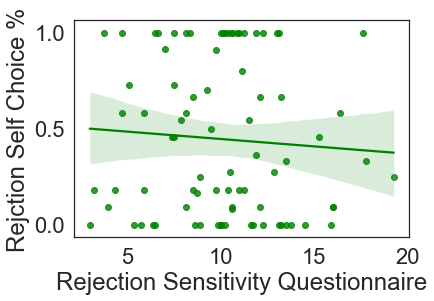

In [123]:
rsqchoicescatter_rej = pd.DataFrame()
rsqchoicescatter_rej['rsq_'] = rsq['RSQ_finalscore']
rsqchoicescatter_rej['rejchoice_'] = rejchoice
r = scipy.stats.spearmanr(a=rsqchoicescatter_rej.rsq_, b=rsqchoicescatter_rej.rejchoice_)[0]
scatter_rsq_rejchoice = sns.regplot(x= "rsq_", y= "rejchoice_", data= rsqchoicescatter_rej, scatter_kws={"color": "green"}, line_kws={"color": "green"})
scatter_rsq_rejchoice.set_ylabel('Rejction Self Choice %')
scatter_rsq_rejchoice.set_xlabel('Rejection Sensitivity Questionnaire')
#scatter_srqadmiration_choice= plt.text(2, .82, 'r = ' + str(round(r, 2)))
plt.savefig('rsq_rejchoice_scatterplot.png', bbox_inches='tight')

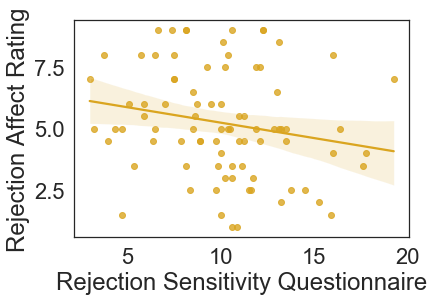

In [124]:
rsqaffectscatter_rej = pd.DataFrame()
rsqaffectscatter_rej['rsq_'] = rsq['RSQ_finalscore']
rsqaffectscatter_rej['rejstress_'] = rejstress
r = scipy.stats.spearmanr(a=rsqaffectscatter_rej.rsq_, b=rsqaffectscatter_rej.rejstress_)[0]
scatter_rsq_rejchoice = sns.regplot(x= "rsq_", y= "rejstress_", data= rsqaffectscatter_rej, scatter_kws={"color": "goldenrod"}, line_kws={"color": "goldenrod"})
scatter_rsq_rejchoice.set_ylabel('Rejection Affect Rating')
scatter_rsq_rejchoice.set_xlabel('Rejection Sensitivity Questionnaire')
#scatter_srqadmiration_choice= plt.text(2, .82, 'r = ' + str(round(r, 2)))
plt.savefig('rsqaffectscatter_scatterplot.png', bbox_inches='tight')

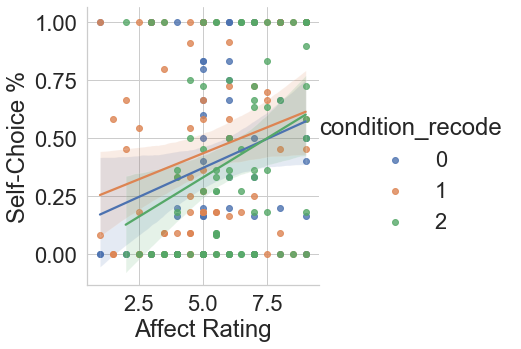

In [125]:
sns.set_style('whitegrid')
mlm= sns.lmplot(x ='recoded_stress', y ='choice', data = updatedchoicedata, hue= 'condition_recode')
mlm.set_axis_labels("Affect Rating", "Self-Choice %")
plt.savefig('mlm_affect.png', bbox_inches='tight')




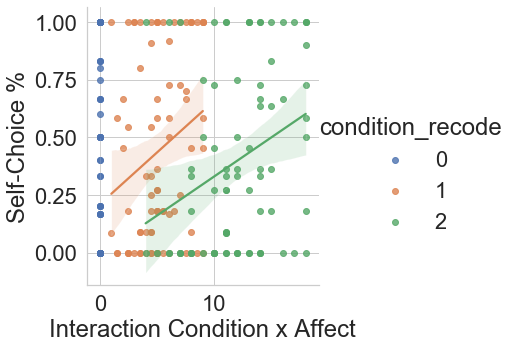

In [126]:
sns.set_style('whitegrid')
mlm2 =sns.lmplot(x ='conditionstress_intterm', y ='choice', data = updatedchoicedata, hue= 'condition_recode')
mlm2.set_axis_labels("Interaction Condition x Affect", "Self-Choice %")
plt.savefig('mlm_affectconditioninteraction.png', bbox_inches='tight')


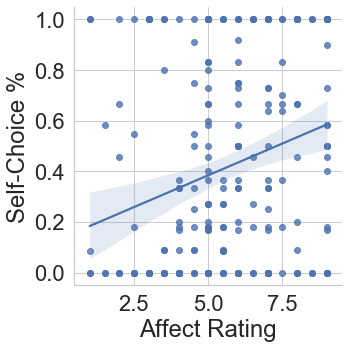

In [127]:
sns.set_style('whitegrid')
mlm= sns.lmplot(x ='recoded_stress', y ='choice', data = updatedchoicedata)
mlm.set_axis_labels("Affect Rating", "Self-Choice %")
plt.savefig('lm_affectandchoice.png', bbox_inches='tight')

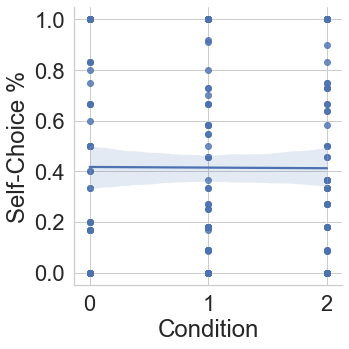

In [128]:
sns.set_style('whitegrid')
lmchoice =sns.lmplot(x ='condition_recode', y ='choice', data = updatedchoicedata)
lmchoice.set_axis_labels("Condition", "Self-Choice %")
plt.savefig('lm_choice.png', bbox_inches='tight')

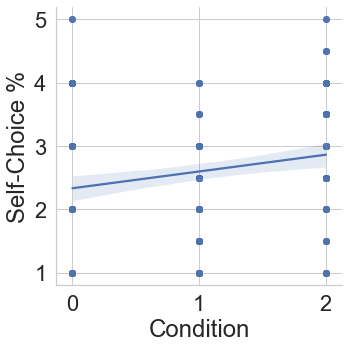

In [129]:
sns.set_style('whitegrid')
lmchoice =sns.lmplot(x ='condition_recode', y ='salience_mean', data = updatedchoicedata)
lmchoice.set_axis_labels("Condition", "Self-Choice %")
plt.savefig('lm_choice.png', bbox_inches='tight')

In [130]:
dast_choicescatter = pd.DataFrame()
dast_choicescatter['DAST_'] = dast['DAST_score']
dast_choicescatter['rejchoice_'] = rejchoice
print(dast_choicescatter)

    DAST_  rejchoice_
0       4    1.000000
1       6    0.250000
2       4    0.090909
3       6    0.500000
4       6    1.000000
..    ...         ...
79      4    0.000000
80      4    0.545455
81      4    0.666667
82      5    1.000000
83      5    0.166667

[84 rows x 2 columns]


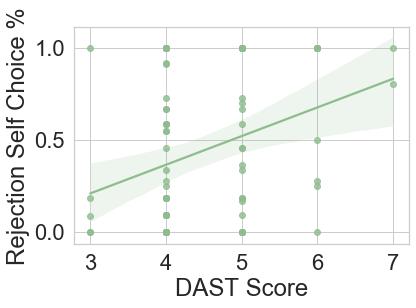

In [131]:
dast_rejchoice_scatter = pd.DataFrame()
dast_rejchoice_scatter['DAST_'] = dast['DAST_score']
dast_rejchoice_scatter['rejchoice_'] = rejchoice
r = scipy.stats.spearmanr(a=dast_rejchoice_scatter.DAST_, b=dast_rejchoice_scatter.rejchoice_)[0]
dast_rejchoice_scatter = sns.regplot(x= "DAST_", y= "rejchoice_", data= dast_rejchoice_scatter, scatter_kws={"color": "darkseagreen"}, line_kws={"color": "darkseagreen"})
dast_rejchoice_scatter.set_ylabel('Rejection Self Choice %')
dast_rejchoice_scatter.set_xlabel('DAST Score')
#scatter_srqadmiration_choice= plt.text(2, .82, 'r = ' + str(round(r, 2)))
plt.savefig('dast_rejchoice_scatter.png', bbox_inches='tight')

In [132]:
print(len(updatedchoicedata['choicedifference_rejneu']))

252


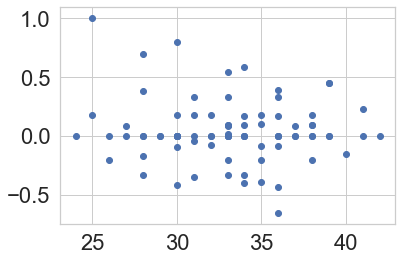

[[16.54202524 -0.09529395]
 [-0.09529395  0.07028786]]
Spearmans correlation: 0.015
p value: 0.8895
Accept null hypothesis that the means are equal.


In [133]:
# prop_choicerej // ntbs
pyplot.scatter(ntbs['NTBS_score'],rej['choicedifference_rejneu'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],rej['choicedifference_rejneu'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],rej['choicedifference_rejneu'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],rej['choicedifference_rejneu'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

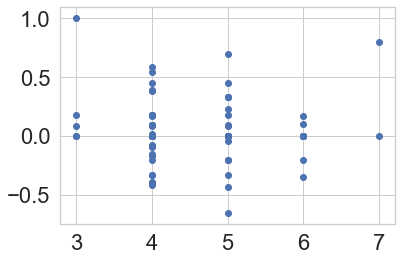

[[ 0.73436604 -0.00550861]
 [-0.00550861  0.07028786]]
Spearmans correlation: -0.054
p value: 0.6260
Accept null hypothesis that the means are equal.


In [134]:
# prop_choicerej // ntbs
pyplot.scatter(dast['DAST_score'],rej['choicedifference_rejneu'])
pyplot.show()
covariance = cov(dast['DAST_score'],rej['choicedifference_rejneu'])
print(covariance)
corr, _ = spearmanr(dast['DAST_score'],rej['choicedifference_rejneu'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(dast['DAST_score'],rej['choicedifference_rejneu'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

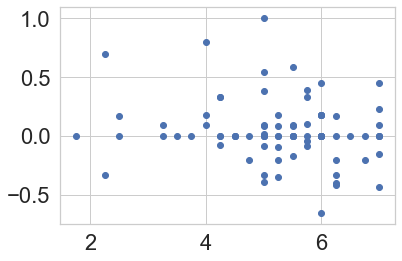

[[ 1.40497705 -0.05060936]
 [-0.05060936  0.07028786]]
Spearmans correlation: -0.138
p value: 0.2106
Accept null hypothesis that the means are equal.


In [135]:
# prop_choicerej // ntbs
pyplot.scatter(srq["SRQ_admiration"],rej['choicedifference_rejneu'])
pyplot.show()
covariance = cov(srq["SRQ_admiration"],rej['choicedifference_rejneu'])
print(covariance)
corr, _ = spearmanr(srq["SRQ_admiration"],rej['choicedifference_rejneu'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(srq["SRQ_admiration"],rej['choicedifference_rejneu'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

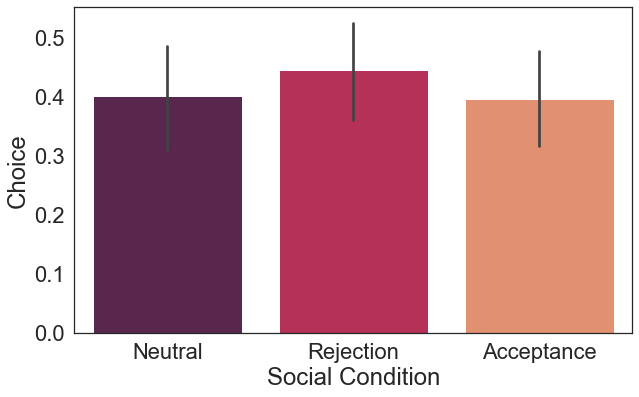

In [136]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
choiceplot = sns.barplot(x='Social Condition', y='Choice', palette='rocket',data= plottingdata)#,errorbar=('ci', 68))
#choiceplot.set_ylabel('Self Choice %')
#sns.set_style('white')
#choiceplot.set_ylim(0,1)
choiceplot.figure.savefig('ANOVA_choiceplotnoorder.png',bbox_inches='tight')

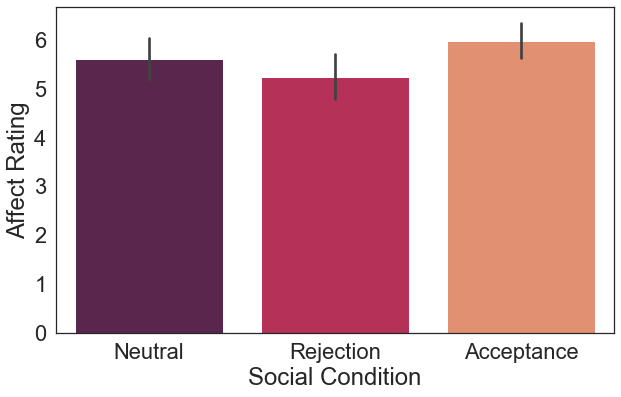

In [137]:
plt.figure(figsize=(10,6))
sns.set(font_scale=2)
sns.set_style('white')
choiceplot = sns.barplot(x='Social Condition', y='recoded_stress', data= plottingdata,palette= 'rocket')#,errorbar=('ci', 68))
choiceplot.set_ylabel('Affect Rating')
choiceplot.set_xlabel('Social Condition')
#choiceplot.set_ylim(1, 9)
choiceplot.figure.savefig('ANOVA_affectplotnoorder.png',bbox_inches='tight')

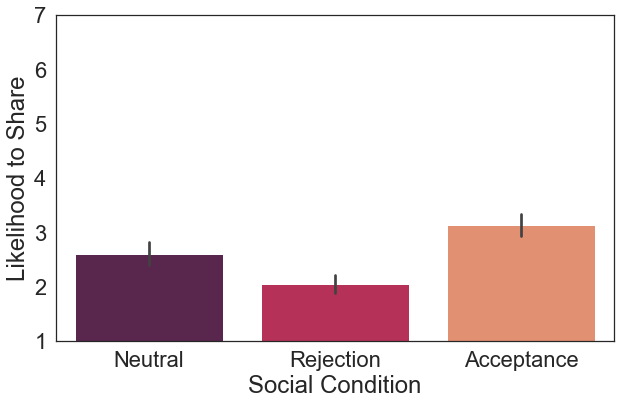

In [138]:
sns.set(font_scale=2)
sns.set_style('white')
plt.figure(figsize=(10,6))
choiceplot = sns.barplot(x='Social Condition', y='salience_mean', data= plottingdata,palette= 'rocket') #errorbar=('ci', 68))
choiceplot.set_ylabel('Likelihood to Share')
choiceplot.set_xlabel('Social Condition')
choiceplot.set_ylim(1, 7)
choiceplot.figure.savefig('ANOVA_sharingplotnoorder.png',bbox_inches='tight')

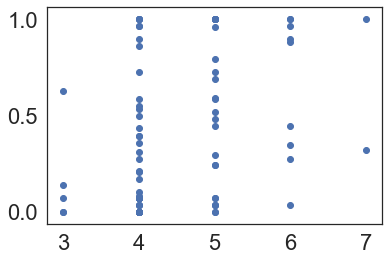

[[0.73436604 0.11204663]
 [0.11204663 0.14582896]]
Spearmans correlation: 0.345
p value: 0.0013
Reject the null hypothesis that the means are equal.


In [139]:
# prop_allchoice // DAST
pyplot.scatter(dast['DAST_score'],rej['overallchoice'])
pyplot.show()
covariance = cov(dast['DAST_score'],rej['overallchoice'])
print(covariance)
corr, _ = spearmanr(dast['DAST_score'],rej['overallchoice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(dast['DAST_score'],rej['overallchoice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

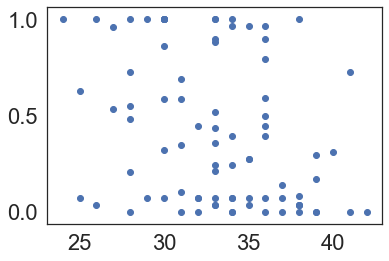

[[16.54202524 -0.51055915]
 [-0.51055915  0.14582896]]
Spearmans correlation: -0.354
p value: 0.0010
Reject the null hypothesis that the means are equal.


In [140]:
# prop_allchoice // NTBS
pyplot.scatter(ntbs['NTBS_score'],rej['overallchoice'])
pyplot.show()
covariance = cov(ntbs['NTBS_score'],rej['overallchoice'])
print(covariance)
corr, _ = spearmanr(ntbs['NTBS_score'],rej['overallchoice'])
print('Spearmans correlation: %.3f' % corr)
r,p = scipy.stats.spearmanr(ntbs['NTBS_score'],rej['overallchoice'])
print('p value: %.4f' % p)

alpha = 0.05
if p > alpha:
 print('Accept null hypothesis that the means are equal.')
else:
    print('Reject the null hypothesis that the means are equal.')

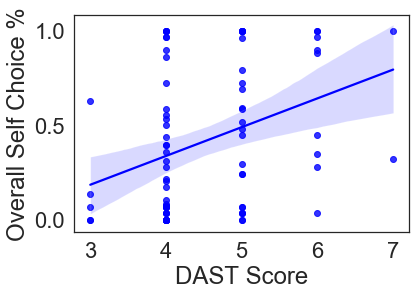

In [141]:
dast_overallchoice_scatter = pd.DataFrame()
dast_overallchoice_scatter['DAST_'] = dast['DAST_score']
dast_overallchoice_scatter['overallchoice_'] = rej['overallchoice']
r = scipy.stats.spearmanr(a=dast_overallchoice_scatter.DAST_, b=dast_overallchoice_scatter.overallchoice_)[0]
dast_overallchoice_scatter = sns.regplot(x= "DAST_", y= "overallchoice_", data= dast_overallchoice_scatter, scatter_kws={"color": "blue"}, line_kws={"color": "blue"})
dast_overallchoice_scatter.set_ylabel('Overall Self Choice %')
dast_overallchoice_scatter.set_xlabel('DAST Score')
#scatter_srqadmiration_choice= plt.text(2, .82, 'r = ' + str(round(r, 2)))
plt.savefig('dast_overallchoice_scatter.png', bbox_inches='tight')

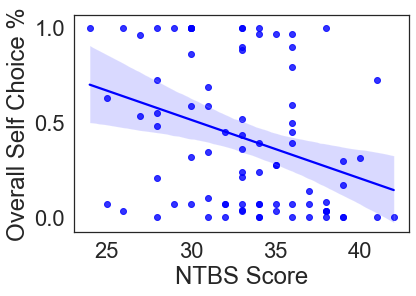

In [142]:
ntbs_overallchoice_scatter = pd.DataFrame()
ntbs_overallchoice_scatter['ntbs_'] = ntbs['NTBS_score']
ntbs_overallchoice_scatter['overallchoice_'] = rej['overallchoice']
r = scipy.stats.spearmanr(a=ntbs_overallchoice_scatter.ntbs_, b=ntbs_overallchoice_scatter.overallchoice_)[0]
ntbs_overallchoice_scatter = sns.regplot(x= "ntbs_", y= "overallchoice_", data= ntbs_overallchoice_scatter, scatter_kws={"color": "blue"}, line_kws={"color": "blue"})
ntbs_overallchoice_scatter.set_ylabel('Overall Self Choice %')
ntbs_overallchoice_scatter.set_xlabel('NTBS Score')
#scatter_srqadmiration_choice= plt.text(2, .82, 'r = ' + str(round(r, 2)))
plt.savefig('ntbs_overallchoice_scatter.png', bbox_inches='tight')

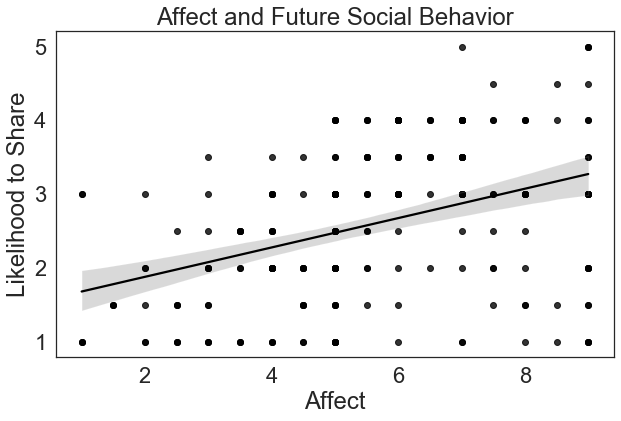

In [158]:
plt.figure(figsize=(10,6))

# Create a regression plot
sns.regplot(x="recoded_stress", y="salience_mean", data=plottingdata, color = 'black')

# Show the plot
plt.title("Affect and Future Social Behavior")
plt.xlabel("Affect")
plt.ylabel("Likelihood to Share")
plt.savefig('affect_futuresocbeh.tiff',bbox_inches='tight')
plt.show()
